In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.io.clipboards import to_clipboard

# 0. Data Loading and Column exploration

## 0.1 Load the data

In [2]:
emdat_data = pd.read_excel("data/public_emdat_incl_hist_2024-03-26.xlsx")

In [3]:
emdat_data

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1900-0003-USA,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,30000.0,1055280.0,2.842847,NaN,2004-10-18,2023-10-17
1,1900-0005-USA,Yes,tec-ind-fir-fir,Technological,Industrial accident,Fire (Industrial),Fire (Industrial),NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,NaN,2003-07-01,2023-09-25
2,1900-0006-JAM,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,JAM,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,NaN,2003-07-01,2023-09-25
3,1900-0007-JAM,Yes,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,Gastroenteritis,JAM,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,NaN,2003-07-01,2023-09-25
4,1900-0008-JPN,Yes,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,NaN,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,NaN,2003-07-01,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26438,2024-0131-BGD,No,tec-mis-fir-fir,Technological,Miscellaneous accident,Fire (Miscellaneous),Fire (Miscellaneous),NaN,Restaurant and building,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-12,2024-03-13
26439,2024-0132-SEN,No,tec-tra-wat-wat,Technological,Transport,Water,Water,NaN,Migrants,SEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-12,2024-03-13
26440,2024-0133-HND,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,HND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-12,2024-03-13
26441,2024-0134-MLI,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,MLI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-12,2024-03-13


## 0.2 Look at the different columns present in the Dataset

In [8]:
emdat_data.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

Precise column descriptions can be found here : https://doc.emdat.be/docs/data-structure-and-content/emdat-public-table/#column-description

# 1. Explore the Dataset

## 1.1 Quantify missing values

Use a heatmap to visualise the missing values across every sample. Here a white line represents a missing value.

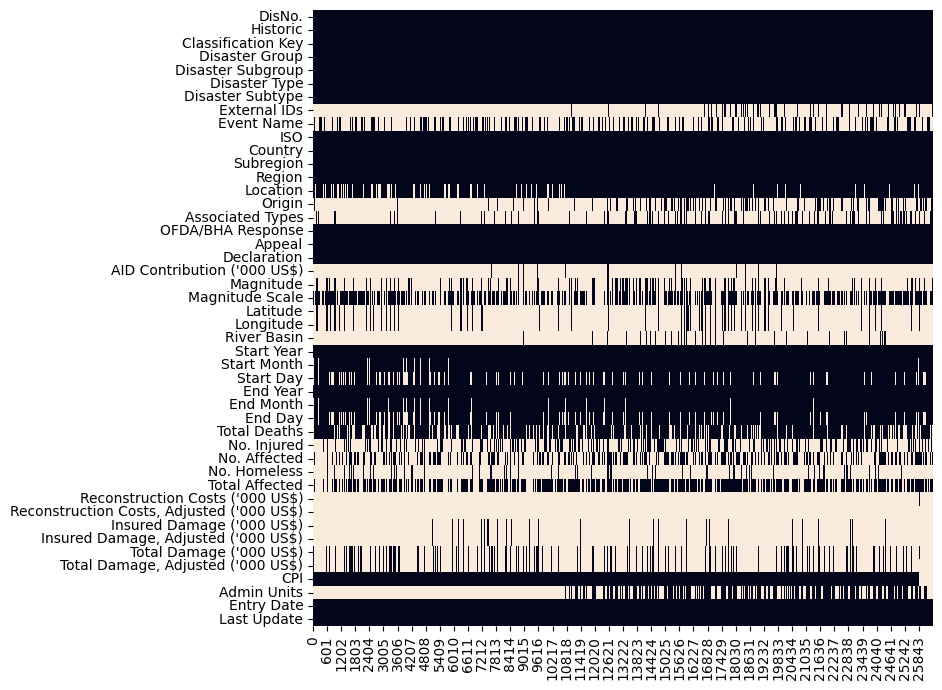

In [83]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(emdat_data.isna().T, cbar=False, yticklabels=True, ax=ax)
plt.savefig("eda_figures/heatmap_missing.png", dpi=400, bbox_inches="tight")
plt.show()

Plot the percentage of missing values in a bar chart.

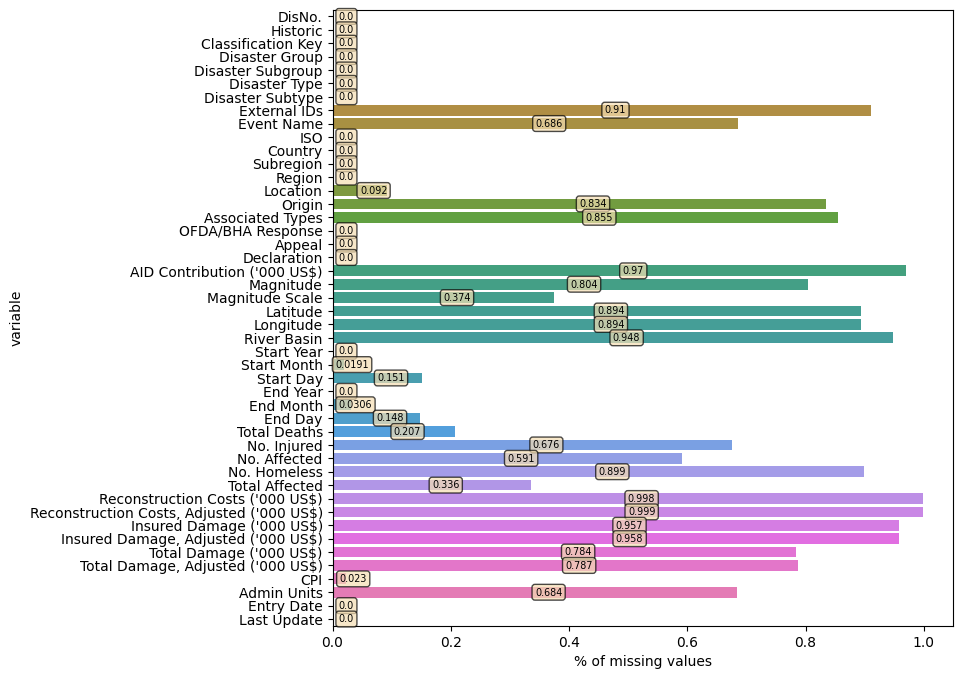

In [82]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(pd.DataFrame(emdat_data.isna().mean()).reset_index().rename(columns={"index":"variable", 0:"% of missing values"}), y="variable", x="% of missing values", ax=ax, hue="variable", legend=False)
for i in ax.containers:
    ax.bar_label(
        i,
        fmt="{:.3}",
        label_type="center",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.7),
        padding=10,
        fontsize="x-small",
    )
plt.savefig("eda_figures/percentage_missing.png", dpi=400, bbox_inches="tight")

In [39]:
to_clipboard(pd.DataFrame(emdat_data.isna().mean()).to_markdown(), excel=False) # Pasted in next cell

| Column Name                               | % of Missing values |
|:------------------------------------------|----------:|
| DisNo.                                    | 0         |
| Historic                                  | 0         |
| Classification Key                        | 0         |
| Disaster Group                            | 0         |
| Disaster Subgroup                         | 0         |
| Disaster Type                             | 0         |
| Disaster Subtype                          | 0         |
| External IDs                              | 0.909957  |
| Event Name                                | 0.685928  |
| ISO                                       | 0         |
| Country                                   | 0         |
| Subregion                                 | 0         |
| Region                                    | 0         |
| Location                                  | 0.0919714 |
| Origin                                    | 0.833983  |
| Associated Types                          | 0.855311  |
| OFDA/BHA Response                         | 0         |
| Appeal                                    | 0         |
| Declaration                               | 0         |
| AID Contribution ('000 US$)               | 0.9702    |
| Magnitude                                 | 0.803767  |
| Magnitude Scale                           | 0.374088  |
| Latitude                                  | 0.89449   |
| Longitude                                 | 0.89449   |
| River Basin                               | 0.947699  |
| Start Year                                | 0         |
| Start Month                               | 0.0190977 |
| Start Day                                 | 0.150853  |
| End Year                                  | 0         |
| End Month                                 | 0.0306319 |
| End Day                                   | 0.147525  |
| Total Deaths                              | 0.206709  |
| No. Injured                               | 0.676323  |
| No. Affected                              | 0.590931  |
| No. Homeless                              | 0.899444  |
| Total Affected                            | 0.335968  |
| Reconstruction Costs ('000 US$)           | 0.998412  |
| Reconstruction Costs, Adjusted ('000 US$) | 0.998563  |
| Insured Damage ('000 US$)                 | 0.957456  |
| Insured Damage, Adjusted ('000 US$)       | 0.957872  |
| Total Damage ('000 US$)                   | 0.783723  |
| Total Damage, Adjusted ('000 US$)         | 0.787203  |
| CPI                                       | 0.0230307 |
| Admin Units                               | 0.683886  |
| Entry Date                                | 0         |
| Last Update                               | 0         |

## 1.2 Look at some statistics of the data across every column/variable

NaN values will appear for the `mean`, `std`, `min`, `max` and `percentiles` startistics if the column is categorical (e.g. string type).

NaN values can appear in the `unique`, `top` and `freq` statistics if there are missing values in that column.

In [84]:
to_clipboard(emdat_data.describe(include="all").T.to_markdown(), excel=False) # Pasted in next cell

|                                           |   count |   unique | top                                            |   freq |             mean |              std |        min |        25% |         50% |              75% |            max |
|:------------------------------------------|--------:|---------:|:-----------------------------------------------|-------:|-----------------:|-----------------:|-----------:|-----------:|------------:|-----------------:|---------------:|
| DisNo.                                    |   26443 |    26443 | 1900-0003-USA                                  |      1 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Historic                                  |   26443 |        2 | No                                             |  15666 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Classification Key                        |   26443 |       66 | tec-tra-roa-roa                                |   2882 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Disaster Group                            |   26443 |        2 | Natural                                        |  17002 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Disaster Subgroup                         |   26443 |        9 | Hydrological                                   |   6762 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Disaster Type                             |   26443 |       32 | Flood                                          |   5936 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Disaster Subtype                          |   26443 |       66 | Road                                           |   2882 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| External IDs                              |    2381 |     1806 | GLIDE:CW-2012-000006                           |     29 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Event Name                                |    8305 |     3588 | Cholera                                        |    503 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| ISO                                       |   26443 |      231 | CHN                                            |   1995 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Country                                   |   26443 |      231 | China                                          |   1995 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Subregion                                 |   26443 |       17 | Sub-Saharan Africa                             |   4649 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Region                                    |   26443 |        5 | Asia                                           |  10935 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Location                                  |   24011 |    20360 | North                                          |     70 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Origin                                    |    4390 |      822 | Heavy rains                                    |   1801 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Associated Types                          |    3826 |      127 | Slide (land, mud, snow, rock)                  |   1202 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| OFDA/BHA Response                         |   26443 |        2 | No                                             |  24591 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Appeal                                    |   26443 |        2 | No                                             |  26220 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Declaration                               |   26443 |        2 | No                                             |  25357 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| AID Contribution ('000 US$)               |     788 |      nan | nan                                            |    nan |  19799           | 167753           |    1       |   175      |    729.5    |   3638.75        |    3.51853e+06 |
| Magnitude                                 |    5189 |      nan | nan                                            |    nan |  47192.9         | 607378           |  -57       |     6.7    |    140      |   7910           |    4e+07       |
| Magnitude Scale                           |   16551 |        6 | Km2                                            |   7222 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Latitude                                  |    2790 |      nan | nan                                            |    nan |     18.5629      |     21.5965      |  -72.64    |     3.295  |     23.016  |     36.5825      |   67.93        |
| Longitude                                 |    2790 |      nan | nan                                            |    nan |     39.377       |     77.3301      | -178.252   |    -0.405  |     48.9935 |    102.655       |  179.65        |
| River Basin                               |    1383 |     1306 | Yangtze river                                  |      9 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Start Year                                |   26443 |      nan | nan                                            |    nan |   1998.86        |     19.3748      | 1900       |  1991      |   2002      |   2012           | 2024           |
| Start Month                               |   25938 |      nan | nan                                            |    nan |      6.484       |      3.42837     |    1       |     4      |      7      |      9           |   12           |
| Start Day                                 |   22454 |      nan | nan                                            |    nan |     15.4087      |      8.91255     |    1       |     8      |     15      |     23           |   31           |
| End Year                                  |   26443 |      nan | nan                                            |    nan |   1998.89        |     19.3659      | 1900       |  1991      |   2002      |   2012           | 2024           |
| End Month                                 |   25633 |      nan | nan                                            |    nan |      6.57957     |      3.40817     |    1       |     4      |      7      |      9           |   12           |
| End Day                                   |   22542 |      nan | nan                                            |    nan |     15.7224      |      8.86314     |    1       |     8      |     16      |     23           |   31           |
| Total Deaths                              |   20977 |      nan | nan                                            |    nan |   1573.86        |  50624.2         |    0       |    11      |     21      |     48           |    3.7e+06     |
| No. Injured                               |    8559 |      nan | nan                                            |    nan |   1305.37        |  23350.4         |    1       |    12      |     31      |    100           |    1.8e+06     |
| No. Affected                              |   10817 |      nan | nan                                            |    nan | 784904           |      7.94416e+06 |    1       |   850      |   7615      |  73260           |    3.3e+08     |
| No. Homeless                              |    2659 |      nan | nan                                            |    nan |  67833.1         | 500471           |    1       |   500      |   2800      |  15000           |    1.585e+07   |
| Total Affected                            |   17559 |      nan | nan                                            |    nan | 494439           |      6.30549e+06 |    1       |    64      |   1217      |  21095           |    3.3e+08     |
| Reconstruction Costs ('000 US$)           |      42 |      nan | nan                                            |    nan |      5.36731e+06 |      1.58769e+07 |   84       | 63125      | 444500      |      3.133e+06   |    1e+08       |
| Reconstruction Costs, Adjusted ('000 US$) |      38 |      nan | nan                                            |    nan |      4.12689e+06 |      8.31757e+06 |  126       | 42873      | 326286      |      3.76488e+06 |    4.39224e+07 |
| Insured Damage ('000 US$)                 |    1125 |      nan | nan                                            |    nan | 916325           |      3.69026e+06 |   34       | 50000      | 170000      | 515000           |    6e+07       |
| Insured Damage, Adjusted ('000 US$)       |    1114 |      nan | nan                                            |    nan |      1.24533e+06 |      4.74013e+06 |   46       | 91423.5    | 254314      | 804434           |    8.99132e+07 |
| Total Damage ('000 US$)                   |    5719 |      nan | nan                                            |    nan | 786216           |      4.91637e+06 |    0       |  8000      |  60000      | 329000           |    2.1e+08     |
| Total Damage, Adjusted ('000 US$)         |    5627 |      nan | nan                                            |    nan |      1.2138e+06  |      6.86133e+06 |    0       | 16026      | 118000      | 592566           |    2.73218e+08 |
| CPI                                       |   25834 |      nan | nan                                            |    nan |     58.8203      |     23.282       |    2.84285 |    46.5366 |     61.4632 |     76.8616      |  100           |
| Admin Units                               |    8359 |     6861 | [{"adm1_code":925,"adm1_name":"Taiwan Sheng"}] |     56 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Entry Date                                |   26443 |     2528 | 2003-07-01                                     |   9392 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |
| Last Update                               |   26443 |       56 | 2023-09-25                                     |  25411 |    nan           |    nan           |  nan       |   nan      |    nan      |    nan           |  nan           |

Just as an example: what are the unique values inside the `Magnitude Scale` columns?

In [54]:
emdat_data["Magnitude Scale"].dropna().unique()

array(['Kph', 'm3', 'Km2', 'Vaccinated', 'Richter', '°C'], dtype=object)

# 2. Visualise the dataset

## 2.1. Look at the different disaster types

<Axes: xlabel='count', ylabel='Disaster Subgroup'>

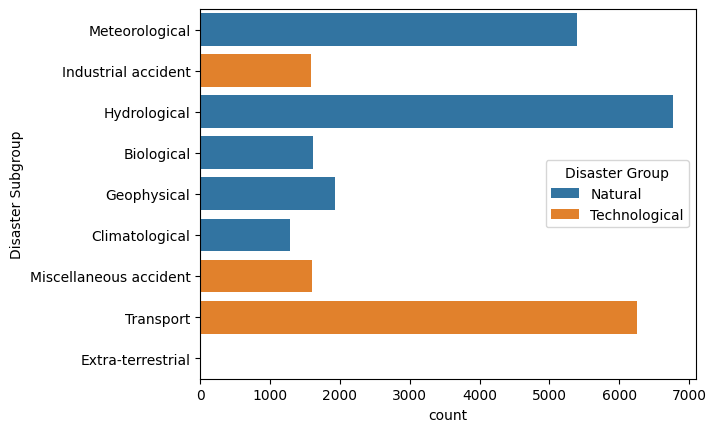

In [4]:
sns.countplot(emdat_data, y="Disaster Subgroup", hue="Disaster Group")

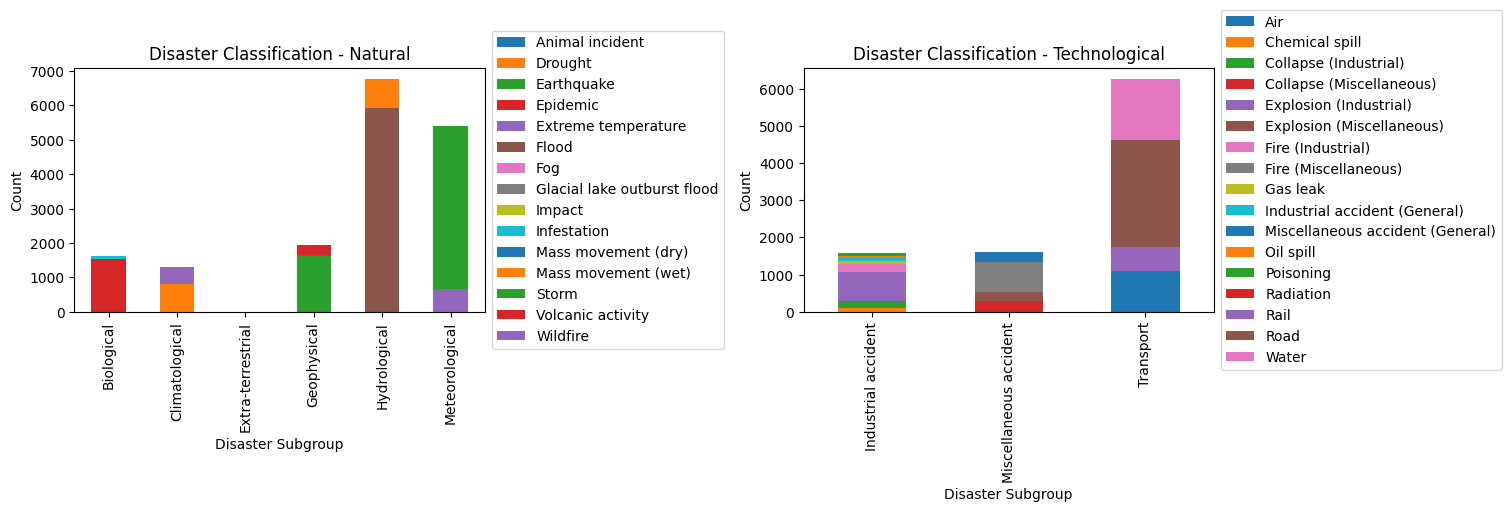

In [85]:
# Get unique 'Disaster Group' values
disaster_groups = emdat_data['Disaster Group'].unique()

# Determine the layout of the subplots
n = len(disaster_groups)
ncols = 2
nrows = n // ncols + (n % ncols > 0)

# Create a subplot for each 'Disaster Group'
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5), constrained_layout=True)

for ax, group in zip(axes.flatten(), disaster_groups):
    grouped = emdat_data[emdat_data['Disaster Group'] == group].groupby(['Disaster Subgroup', 'Disaster Type']).size().unstack()
    grouped.plot(kind='bar', stacked=True, ax=ax)
    ax.set_ylabel('Count')
    ax.set_title(f'Disaster Classification - {group}')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Remove empty subplots
if len(disaster_groups) < nrows*ncols:
    for idx in range(len(disaster_groups), nrows*ncols):
        fig.delaxes(axes.flatten()[idx])
plt.savefig("eda_figures/disaster_types.png", dpi=400, bbox_inches="tight")
plt.show()

In [56]:
# # Same plot as before just different not as much colours
# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
# for i, (ax, disaster_subgroup) in enumerate(zip(axes.flatten(), emdat_data["Disaster Subgroup"].dropna().unique())):
#     sns.countplot(
#         emdat_data[emdat_data["Disaster Subgroup"]==disaster_subgroup],
#         y="Disaster Subtype",
#         legend=False,
#         ax=ax,
#     )
#     if i % 3 != 0:
#         ax.set_ylabel("")
#     if i < 6:
#         ax.set_xlabel("")
#     ax.set_title(f"Subgroup = {disaster_subgroup}")
# plt.tight_layout()
# plt.show()

What is this "Extra-terrestrial" disaster subgroup?

In [57]:
emdat_data[emdat_data["Disaster Subgroup"] == "Extra-terrestrial"]

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
20315,2013-0060-RUS,No,nat-ext-imp-col,Natural,Extra-terrestrial,Impact,Collision,NaN,NaN,RUS,...,NaN,NaN,NaN,NaN,33000.0,41457.0,79.601309,"[{""adm1_code"":2499,""adm1_name"":""Chelyabinskaya...",2014-03-21,2024-02-06


## 2.2 Look at a histogram of the Disasters across time

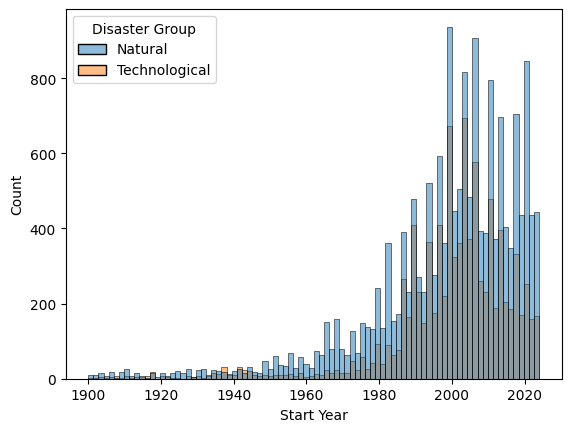

In [86]:
sns.histplot(emdat_data, x="Start Year", hue="Disaster Group")
plt.savefig("eda_figures/disaster_counts_per_year.png", dpi=400, bbox_inches="tight")

## 2.3 Focus on the Natural disasters and plot the relationship between the total number of people affected by a certain disaster type across every year

In [59]:
total_affected_data = emdat_data[emdat_data["Disaster Group"] == "Natural"].dropna(subset=["Total Affected"])
total_affected_data

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
10,1901-0004-JPN,Yes,nat-geo-ear-tsu,Natural,Geophysical,Earthquake,Tsunami,NaN,NaN,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,NaN,2005-04-26,2023-09-25
18,1902-0011-SUN,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,SUN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.956561,NaN,2003-07-01,2023-09-25
20,1902-0013-SUN,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,SUN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.956561,NaN,2019-08-05,2023-09-25
25,1903-0006-CAN,Yes,nat-geo-mmd-roc,Natural,Geophysical,Mass movement (dry),Rockfall (dry),NaN,NaN,CAN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.070275,NaN,2003-07-01,2023-09-25
26,1903-0007-TUR,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,TUR,...,NaN,NaN,NaN,NaN,NaN,NaN,3.070275,NaN,2003-07-01,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26426,2024-0076-OMN,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,OMN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-13,2024-03-13
26432,2024-0092-AFG,No,nat-hyd-mmw-roc,Natural,Hydrological,Mass movement (wet),Rockfall (wet),NaN,NaN,AFG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-26,2024-02-27
26434,2024-0106-THA,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,NaN,THA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-27,2024-02-29
26436,2024-0120-IRN,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IRN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-11,2024-03-25


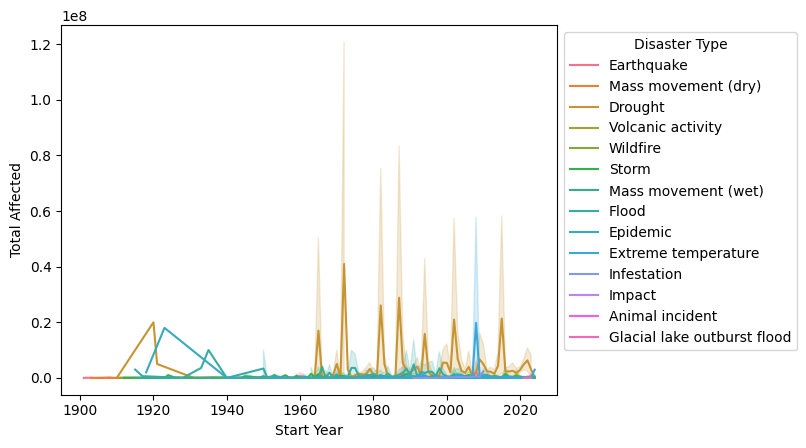

In [87]:
ax = sns.lineplot(
    total_affected_data
    # # Boolean filters to zoom into the plot by removing the largest values
    # [
    #     (total_affected_data["Disaster Type"] != "Drought") 
    #     * (total_affected_data["Disaster Type"] != "Epidemic")
    #     * (total_affected_data["Disaster Type"] != "Extreme temperature")
    # ]
    ,
    x="Start Year",
    y="Total Affected",
    hue="Disaster Type",
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig("eda_figures/total_affected_per_year.png", dpi=400, bbox_inches="tight")

We can see that in recent years, droughts, and extreme temperatures affected the most people. 

## 2.4. Focus on the Natural disasters and plot the relationship between the total damage costs of a certain disaster type across every year

In [60]:
total_damage_adjusted = emdat_data[emdat_data["Disaster Group"] == "Natural"].dropna(subset=["Total Damage, Adjusted ('000 US$)"])
total_damage_adjusted

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1900-0003-USA,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,30000.0,1055280.0,2.842847,NaN,2004-10-18,2023-10-17
19,1902-0012-GTM,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,GTM,...,NaN,NaN,NaN,NaN,25000.0,845577.0,2.956561,NaN,2003-07-01,2023-09-25
22,1903-0002-USA,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,USA,...,NaN,NaN,NaN,NaN,480000.0,15633778.0,3.070275,NaN,2003-07-01,2023-09-25
44,1905-0003-IND,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,25000.0,814259.0,3.070275,NaN,2003-07-01,2023-09-25
49,1905-0008-ALB,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,ALB,...,NaN,NaN,NaN,NaN,23800.0,775175.0,3.070275,NaN,2019-08-06,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25810,2022-0863-USA,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,USA,...,NaN,NaN,NaN,NaN,1000000.0,1000000.0,100.000000,NaN,2023-01-05,2024-01-17
25812,2022-9174-ETH,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,GLIDE:DR-2022-000168,NaN,ETH,...,NaN,NaN,NaN,NaN,640000.0,640000.0,100.000000,"[{""adm1_code"":1236,""adm1_name"":""SNNPR""},{""adm1...",2022-03-25,2023-09-26
25813,2022-9209-USA,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,22000000.0,22000000.0,100.000000,"[{""adm1_code"":3216,""adm1_name"":""Arizona""},{""ad...",2022-04-14,2023-09-26
25814,2022-9211-BRA,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,BRA,...,NaN,NaN,NaN,NaN,4000000.0,4000000.0,100.000000,NaN,2022-04-14,2023-09-26


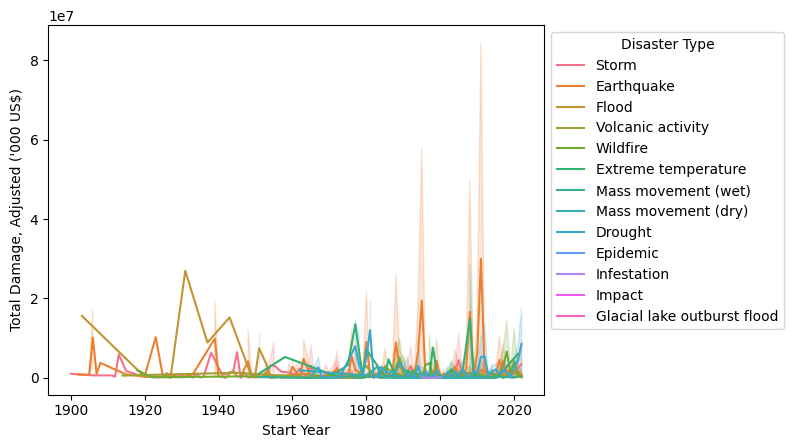

In [88]:
ax = sns.lineplot(
    total_damage_adjusted,
    x="Start Year",
    y="Total Damage, Adjusted ('000 US$)",
    hue="Disaster Type",
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig("eda_figures/total_damage_costs_per_year.png", dpi=400, bbox_inches="tight")

In recent years, Earthquakes seem to have the biggest associated costs.

# 3. How to process some other variables

## 3.1 Relationship

List of secondary disaster types cascading from or co-occurring aside from the main type.
One MAIN disaster can have multiples associated disaters (that is why we split it)

In [62]:
a = emdat_data["Associated Types"].dropna()
# separate the values in the 'Associated Types' column by "|"
a = a.str.split("|", expand=True)
# count the unique values in total of all columns
a = a.stack().value_counts()
a

Slide (land, mud, snow, rock)    1676
Flood                            1047
Hail                              241
Rain                              214
Tsunami/Tidal wave                183
Food shortage                     172
Broken Dam/Burst bank             171
Lightening                        112
Storm                             107
Cold wave                          92
Snow/ice                           83
Famine                             74
Transport accident                 70
Heat wave                          65
Surge                              65
Fire                               59
Wildfire                           30
Water shortage                     25
Drought                            25
Collapse                           24
Pollution                          17
Avalanche (Snow, Debris)           15
Crop failure                       15
Explosion                          13
Industrial accidents               10
Oil spill                           9
Earthquake  

In [63]:
# Get unique disaster types from the dataset
unique_disaster_types = emdat_data["Disaster Type"].unique()

# Create an empty dictionary to store the results for each disaster type
associated_type_counts_per_disaster_type = {}

# Iterate over each disaster type
for disaster_type in unique_disaster_types:
    # Filter the original dataset by the current disaster type
    filtered_data = emdat_data[emdat_data["Disaster Type"] == disaster_type]
    
    # Drop NaN values and split values in the 'Associated Types' column by "|"
    associated_types = filtered_data["Associated Types"].dropna().str.split("|", expand=True)
    
    # Stack the DataFrame to reshape it and count the unique values
    associated_type_counts = associated_types.stack().value_counts()
    
    # Store the result for the current disaster type in the dictionary
    associated_type_counts_per_disaster_type[disaster_type] = associated_type_counts

# Display the result for each disaster type
for disaster_type, counts in associated_type_counts_per_disaster_type.items():
    print(f"Disaster Type: {disaster_type}")
    print(counts)
    print()


Disaster Type: Storm
Flood                            971
Slide (land, mud, snow, rock)    372
Hail                             223
Rain                              97
Cold wave                         72
Surge                             63
Lightening                        51
Transport accident                47
Snow/ice                          23
Avalanche (Snow, Debris)          13
Broken Dam/Burst bank             10
Fire                               5
Tsunami/Tidal wave                 3
Oil spill                          2
Storm                              2
Wildfire                           1
Industrial accidents               1
Name: count, dtype: int64

Disaster Type: Fire (Industrial)
Explosion    5
Name: count, dtype: int64

Disaster Type: Flood
Slide (land, mud, snow, rock)    1095
Broken Dam/Burst bank             158
Rain                              107
Storm                              96
Lightening                         59
Hail                               18

## 3.2 Origin values
Allow us to have access to some type of text for some disasters type (the origin of the disaster), they are quite unique for each case without a lot of repetitions...
Only 889 different origin name for a total of 4390 samples.

In [64]:
print(len(emdat_data["Origin"].dropna()))
emdat_data["Origin"].dropna().unique()

4390


array(['Earthquake', 'Violent storm', 'Meteorological',
       'Volacno and landslide', 'Collapse of bridges',
       'Storm and wave surge', 'Late arrival of rain',
       'Erreur aiguillage', 'Fire', 'Typhoon', 'Heavy rains',
       'Earthquake and landslide', 'Landslide', 'Heavy rain', 'Famine',
       'El Nino', 'Explosion during refueling', 'Short circuit',
       'Brief torrential rains', 'Gas leak', 'Monsoon rain',
       'Collision with a bus', 'Brief torrential rain', 'Drought period',
       'Rain, snowmelt', 'Monsoonal rain', 'Tropical cyclone',
       'Extra-tropical cyclone', 'Heavy rains and thunderstorms',
       'Prolonged drought', 'Monsoon rains',
       'Volcanic activity, tropical rainstorms and ash from the eruptions',
       'Monssonal rain', 'monsoonal rain', 'Heavy rains, tremor',
       'Snowmelt and Heavy rains', 'Heavy rain and Snowmelt', 'Snowmelt',
       'Hevay rain', 'Snow storm and heavy winds',
       'Heavy rains, melting snow', 'Rain and snowmelt',
  

In [80]:
# Group by 'Disaster Subgroup' and 'Disaster Type', then filter groups to only include those with at least one non-NaN 'Origin'
grouped = emdat_data.groupby(['Disaster Subgroup', 'Disaster Type'])
filtered_groups = grouped.filter(lambda x: x['Origin'].notna().any())

# Count occurrences of each unique origin for each disaster subgroup and type
origin_counts = filtered_groups.groupby(['Disaster Subgroup', 'Disaster Type', 'Origin']).size()

# Filter out categories with zero origin values
filtered_origin_counts = origin_counts[origin_counts > 0]
print(len(filtered_origin_counts))

# Sort the origin_counts in descending order to get the most frequent origins
sorted_origin_counts = filtered_origin_counts.groupby(level=['Disaster Subgroup', 'Disaster Type']).nlargest(4)

sorted_origin_counts.to_csv('output_origin_variable.csv')
print(sorted_origin_counts)

889
Disaster Subgroup  Disaster Type  Disaster Subgroup  Disaster Type  Origin                                                             
Biological         Epidemic       Biological         Epidemic       Contaminated water                                                      2
                                                                    After flood                                                             1
                                                                    After flooding                                                          1
                                                                    Basic infrastructure inefficient, water quality and sanitation poor     1
Climatological     Drought        Climatological     Drought        El Nino                                                                34
                                                                                                                                           ..
Transpor